In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json

# Choose a Kinematic Solver Type

Import CSV file as DataFrame. Drop the incomplete first loop with index -1

In [3]:
joint_positions_speed = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_094832')
joint_positions_distance = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_090327')
joint_positions_manipulator1 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_080501')
joint_positions_manipulator2 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')

l_of_jp = [joint_positions_speed, joint_positions_distance, joint_positions_manipulator1, joint_positions_manipulator2]

for jp in l_of_jp:
    jp.drop(jp.loc[jp['loop_count']==-1].index, inplace=True)
    jp.drop(jp.loc[jp['loop_count']==jp['loop_count'].iloc[-1]].index, inplace=True)

In [4]:
joint_positions_speed

,seq,timestamp,loop_count,a1,a2,a3,a4,a5,a6,a7
371,371,20230123094836968566,18,0.991292,1.569808,0.823910,0.305628,-2.094962,0.810038,1.164137
372,372,20230123094836972462,18,0.991792,1.569477,0.824089,0.305008,-2.099355,0.809848,1.168148
373,373,20230123094836975964,18,0.992186,1.569207,0.824232,0.304518,-2.102870,0.809683,1.171351
374,374,20230123094836979789,18,0.992574,1.568929,0.824374,0.304032,-2.106386,0.809504,1.174548
375,375,20230123094836983842,18,0.992859,1.568722,0.824480,0.303669,-2.109018,0.809386,1.176939
...,...,...,...,...,...,...,...,...,...,...
184844,184844,20230123102601800117,150,0.741551,1.363471,1.019691,-0.340330,0.571234,-0.923762,-1.557247
184845,184845,20230123102601804102,150,0.742517,1.363878,1.019235,-0.338934,0.571781,-0.925012,-1.557659
184846,184846,20230123102601843083,150,0.743475,1.364283,1.018778,-0.337557,0.572339,-0.926240,-1.558076
184847,184847,20230123102601847122,150,0.752149,1.368251,1.014351,-0.325177,0.577732,-0.938411,-1.562395


## IK solver type: Speed

In [5]:
s_mean = joint_positions_speed[joint_positions_speed.columns[3:]].mean()
s_std = joint_positions_speed[joint_positions_speed.columns[3:]].std()

## IK solver type: Distance

In [6]:
d_mean = joint_positions_distance[joint_positions_distance.columns[3:]].mean()
d_std = joint_positions_distance[joint_positions_distance.columns[3:]].std()

## IK solver type: Manipulator1

In [7]:
(joint_positions_manipulator1['loop_count'].min(), joint_positions_manipulator1['loop_count'].max())

(2, 164)

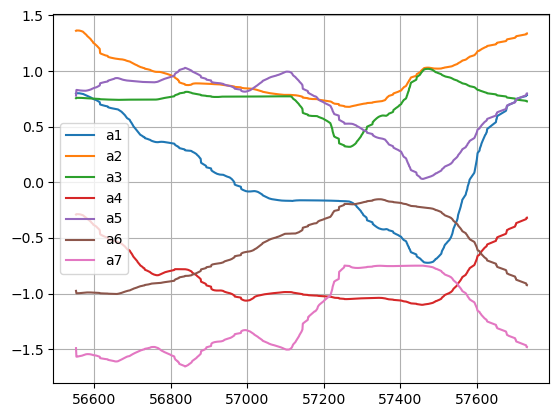

In [8]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator1.columns[3:]:
    ax.plot(joint_positions_manipulator1[joint].loc[joint_positions_manipulator1['loop_count']==35], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

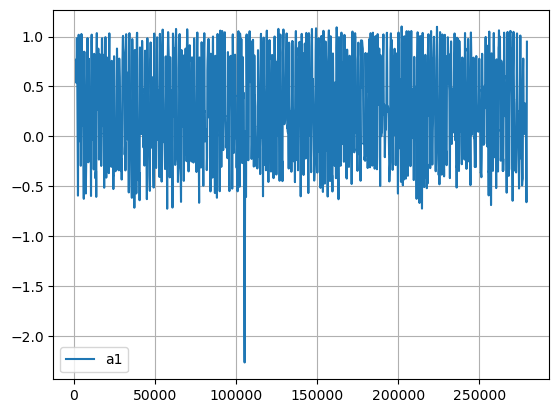

In [9]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator1['a1'], label='a1')
ax.legend()
ax.grid()

In [10]:
m1_mean = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].mean()
m1_std = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].std()

## IK solver type: Manipulator2

Range of the loops

In [11]:
(joint_positions_manipulator2['loop_count'].min(), joint_positions_manipulator2['loop_count'].max())

(61, 181)

Plot the joint angles

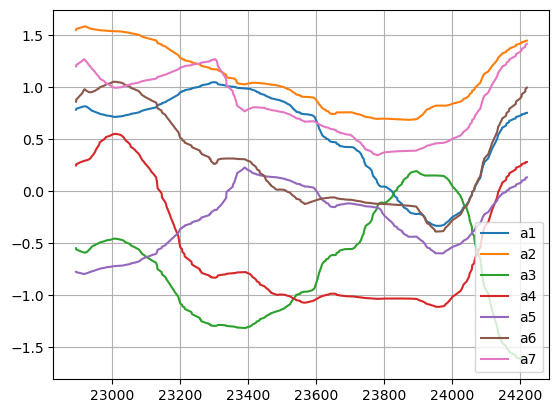

In [12]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator2.columns[3:]:
    ax.plot(joint_positions_manipulator2[joint].loc[joint_positions_manipulator2['loop_count']==75], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

absolute values of joint angles

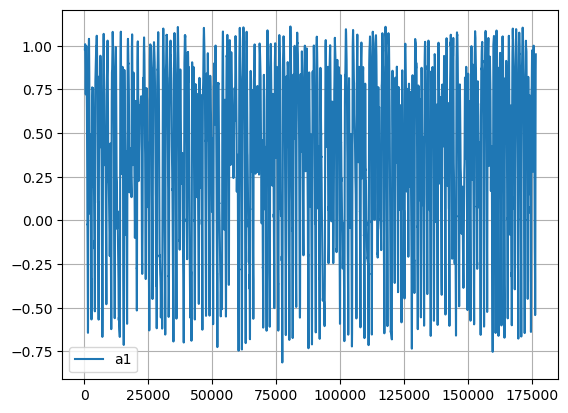

In [13]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator2['a1'], label='a1')
ax.legend()
ax.grid()

mean

In [14]:
m2_mean = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].mean()
m2_std = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].std()

## Results

In [15]:
r = {'speed_mean':s_mean, 'speed_std':s_std, 'distance_mean':d_mean, 'distance_std':d_std, 'manipulator1_mean':m1_mean, 'manipulator1_std':m1_std, 'manipulator2_mean':m2_mean, 'manipulator2_std':m2_std}
results = pd.concat(r, axis=1)
results

,speed_mean,speed_std,distance_mean,distance_std,manipulator1_mean,manipulator1_std,manipulator2_mean,manipulator2_std
a1,-0.338367,1.327807,0.058732,0.990634,0.301400,0.447773,0.394705,0.484601
a2,0.486481,1.051576,0.912949,0.760512,1.084583,0.278841,1.003169,0.224913
a3,0.200756,1.506091,0.453095,1.313050,-0.108011,0.669898,-0.189029,0.709103
a4,0.066922,0.843676,-0.252107,0.817011,-0.386362,0.692623,-0.685738,0.474417
a5,-0.082829,1.557750,-0.102627,1.298988,0.080639,0.605970,0.083968,0.593313
a6,0.044120,0.632960,0.048678,0.668387,0.048857,0.597673,-0.067131,0.498219
a7,-0.094133,1.431520,-0.167693,1.529405,0.035848,0.951351,0.079580,0.942902


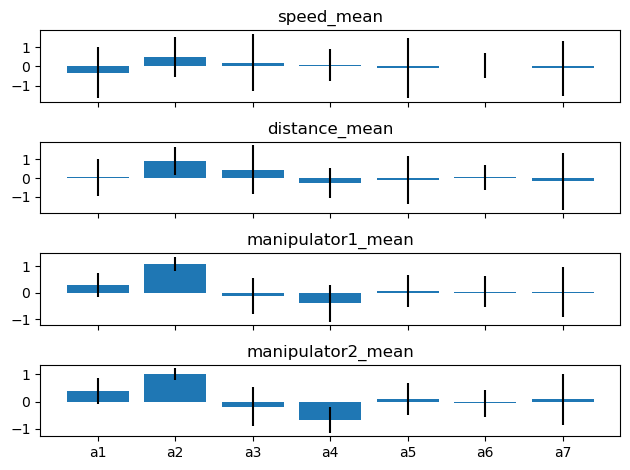

In [16]:
fix, axs = plt.subplots(4, sharex=True)
for plot, i in zip(range(4), range(0,7,2)):
    axs[plot].bar(range(7), results[results.columns[i]], yerr=results[results.columns[i+1]], tick_label=results.index )
    axs[plot].set_title(results.columns[i])

plt.tight_layout()

# Find the best route for a given Solver Type

## read csv data

In [17]:
joint_positions_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_105247')
joint_positions_manipulator1_long.drop(joint_positions_manipulator1_long.loc[joint_positions_manipulator1_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_105247')
joint_velocity_manipulator1_long.drop(joint_velocity_manipulator1_long.loc[joint_velocity_manipulator1_long['loop_count']==-1].index, inplace=True)

In [18]:
joint_positions_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_152415')
joint_positions_manipulator2_long.drop(joint_positions_manipulator2_long.loc[joint_positions_manipulator2_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_152415')
joint_velocity_manipulator2_long.drop(joint_velocity_manipulator2_long.loc[joint_velocity_manipulator2_long['loop_count']==-1].index, inplace=True)

In [19]:
jpm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230124_103805')
jpm1_10.drop(jpm1_10.loc[jpm1_10['loop_count']==-1].index, inplace=True)
jvm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230124_103805')
jvm1_10.drop(jvm1_10.loc[jvm1_10['loop_count']==-1].index, inplace=True)

In [20]:
jpm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230125_075156')
jpm1_5.drop(jpm1_5.loc[jpm1_5['loop_count']==-1].index, inplace=True)
jvm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230125_075156')
jvm1_5.drop(jvm1_5.loc[jvm1_5['loop_count']==-1].index, inplace=True)

## Additionals

In [21]:
def get_cycle_time(df, cycle_number=None):
    if not cycle_number == None:
        return (int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[0]))/1000000
    else:
        l_of_ct = []
        for cycle in df['loop_count'].unique():
            l_of_ct.append(get_cycle_time(df, cycle))
        return l_of_ct

def get_joint_position(df, cycle_number, position=None):
    if position == 'initial':
        return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[0].to_list()
    elif position == 'final':
        return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[-1].to_list()
    else:
        l_of_positions = []
        for row in df['loop_count'].unique():
            l_of_positions.append(df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[row].to_list())
        return l_of_positions


## Ansatz 1: Minimierung der absoluten Achsgeschwindigkeit

* Schleife über jeden Zyklus
* Berechnung der Summe der absoluten Achsgeschwindigkeiten
* Mittelwert und Std für jeden Zyklus

In [22]:
def min_velo_mean_std(df1):
    l_of_mean = []
    l_of_std = []
    for cycle in df1['loop_count'].unique():
        mean = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).mean()
        std = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).std()
        l_of_mean.append((mean, cycle))
        l_of_std.append((std, cycle))

    
    '''plt.subplot(211)
    plt.bar([x[1] for x in l_of_mean], [y[0] for y in l_of_mean])
    plt.title('mean')
    plt.subplot(212)
    plt.bar([x[1] for x in l_of_std], [y[0] for y in l_of_std])
    plt.title('std')'''
    
    return (l_of_mean, l_of_std)

#min_velo_mean_std(joint_velocity_manipulator1_long)

## Ansatz 2: Minimierung der Zeit pro Zyklus

In [23]:
def min_time_cycle(df):
    l_of_ct = []
    for cycle in df['loop_count'].unique():
        cycle_time = (int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[0]))/1000000
        l_of_ct.append((cycle_time, cycle))

    #plt.bar([x[1] for x in l_of_ct], [y[0] for y in l_of_ct])
    return l_of_ct

#min_time_cycle(joint_positions_manipulator1_long)

## Ansatz 3: Minimierung der absoluten Achsbewegung

In [24]:
def min_joint_movement(df):
    l_of_integrals = []
    for cycle in df['loop_count'].unique():
        cycle_joints = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().cumsum(axis=0)
        cycle_cumulated = cycle_joints.cumsum(axis=1)['a7'] # the accumulated result is written in the last column
        integral = cycle_cumulated.sum()/len(cycle_cumulated)
        l_of_integrals.append((integral, cycle))

    #plt.bar([x[1] for x in l_of_integrals], [y[0] for y in l_of_integrals])

    return l_of_integrals

#min_joint_movement(joint_positions_manipulator1_long)

## Results #2

In [25]:
df = joint_positions_manipulator1_long
df_velo = joint_velocity_manipulator1_long

long tracking every 10th point

In [26]:
df = jpm1_10
df_velo = jvm1_10

long tracking every 5th point

In [27]:
df = jpm1_5
df_velo = jvm1_5

In [28]:
joint_positions = {}

### Joint Velocities

In [29]:
mvms = min_velo_mean_std(df_velo)

In [30]:
min(mvms[0], key=lambda t:t[0])

(0.00010141565654038151, 728)

Best cycle by mean of absolute joint velocity: (0.00010141565654038151, 728)
cycle time: 7.286233
Best cycle by std of absolute joint velocity: (5.771841377096697e-05, 728)
cycle time: 7.286233


Text(0.5, 1.0, 'std: 0.0 #728')

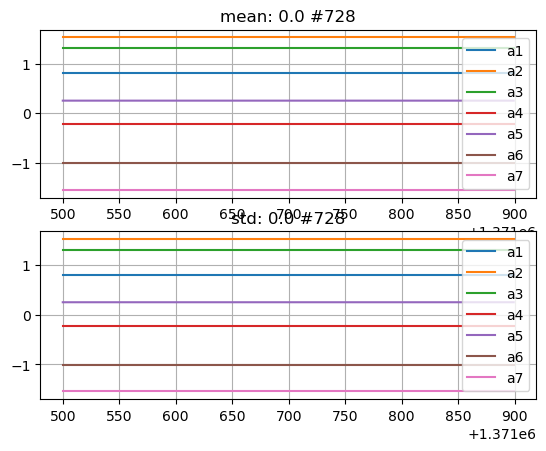

In [31]:
print('Best cycle by mean of absolute joint velocity: '+str(min(mvms[0], key=lambda t:t[0])))
print('cycle time: '+str(get_cycle_time(df, min(mvms[0], key=lambda t:t[0])[1])))
print('Best cycle by std of absolute joint velocity: '+str(min(mvms[1], key=lambda t:t[0])))
print('cycle time: '+str(get_cycle_time(df, min(mvms[1], key=lambda t:t[0])[1])))
plt.subplot(211)
plt.plot(df.loc[(df['loop_count']==min(mvms[0], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('mean: '+str(np.round(min(mvms[0], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[0], key=lambda t:t[0])[1]))
plt.subplot(212)
plt.plot(df.loc[(df['loop_count']==min(mvms[1], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('std: '+str(np.round(min(mvms[1], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[1], key=lambda t:t[0])[1]))

In [32]:
joint_positions['mvms_mean_init'] = get_joint_position(df, min(mvms[0], key=lambda t:t[0])[1], 'initial')
joint_positions['mvms_mean_final'] = get_joint_position(df, min(mvms[0], key=lambda t:t[0])[1], 'final')
joint_positions['mvms_std_init'] = get_joint_position(df, min(mvms[1], key=lambda t:t[0])[1], 'initial')
joint_positions['mvm_std_final'] = get_joint_position(df, min(mvms[1], key=lambda t:t[0])[1], 'final')

In [33]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data_mvms_mean_full.json', 'w') as file:
    json.dump(get_joint_position(df, min(mvms[0], key=lambda t:t[0])[1]), file, indent=4)
    file.close()

with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data_mvms_std_full.json', 'w') as file:
    json.dump(get_joint_position(df, min(mvms[1], key=lambda t:t[0])[1]), file, indent=4)
    file.close()

IndexError: single positional indexer is out-of-bounds

### Cycle Time

In [ ]:
mtc = min_time_cycle(df)

(7.286233, 728)
7.286233


Text(0.5, 1.0, 'cycle time: 7.29s #728')

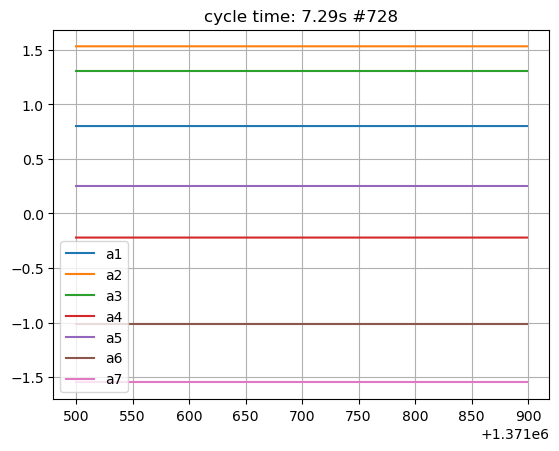

In [ ]:
print(min(mtc, key=lambda t:t[0]))
print(get_cycle_time(df, min(mtc, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mtc, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('cycle time: '+str(np.round(min(mtc, key=lambda t:t[0])[0],2))+'s #'+str(min(mtc, key=lambda t:t[0])[1]))

In [ ]:
joint_positions['mtc_init'] = get_joint_position(df, min(mtc, key=lambda t:t[0])[1], 'initial')
joint_positions['mtc_final'] = get_joint_position(df, min(mtc, key=lambda t:t[0])[1], 'final')

In [ ]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data_mtc_full.json', 'w') as file:
    json.dump(get_joint_position(df, min(mtc, key=lambda t:t[0])[1]), file, indent=4)
    file.close()

IndexError: single positional indexer is out-of-bounds

### Accumulated Joint Movement

#### min joint movement of "short term" cylces speed, distance, manip1 and manip2

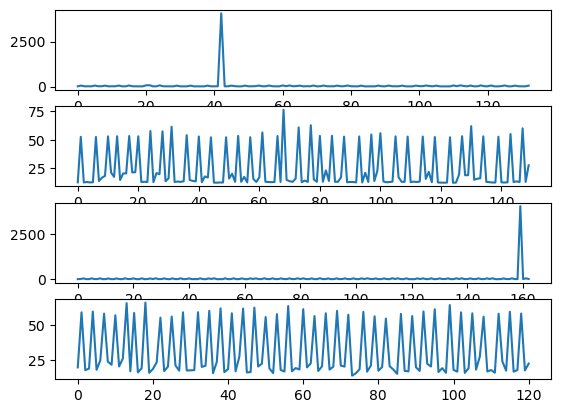

In [ ]:
fig, axs = plt.subplots(4)

axs[0].plot(get_cycle_time(joint_positions_speed))
axs[1].plot(get_cycle_time(joint_positions_distance))
axs[2].plot(get_cycle_time(joint_positions_manipulator1))
axs[3].plot(get_cycle_time(joint_positions_manipulator2))

fix long cycle time in speed and manip1

In [ ]:
get_cycle_time(joint_positions_speed)[42]

4062.34418

In [ ]:
get_cycle_time(joint_positions_manipulator1)[159]

4067.219659

In [ ]:
initial_cycle = joint_positions_speed['loop_count'].iloc[0]
joint_positions_speed.drop(joint_positions_speed.loc[joint_positions_speed['loop_count']==42+initial_cycle].index, inplace=True)

In [ ]:
initial_cycle = joint_positions_manipulator1['loop_count'].iloc[0]
joint_positions_manipulator1.drop(joint_positions_manipulator1.loc[joint_positions_manipulator1['loop_count']==159+initial_cycle].index, inplace=True)

In [ ]:
mjm_speed = min_joint_movement(joint_positions_speed)
mjm_distance = min_joint_movement(joint_positions_distance)
mjm_manip1 = min_joint_movement(joint_positions_manipulator1)
mjm_manip2 = min_joint_movement(joint_positions_manipulator2)

#### min joint movement of "long term" cycles with solver type manip1 (every 10th, 5th point)

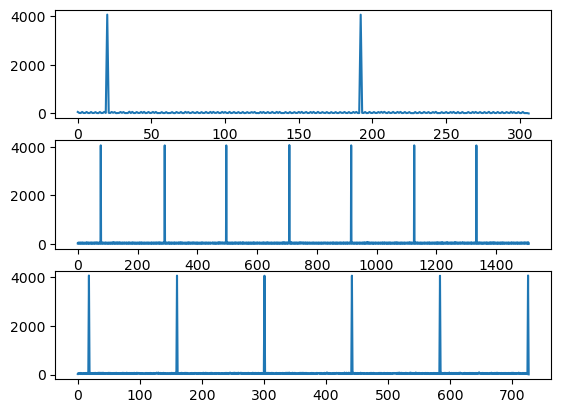

In [ ]:
fig, axs = plt.subplots(3)

axs[0].plot(get_cycle_time(joint_positions_manipulator1_long))
axs[1].plot(get_cycle_time(jpm1_10))
axs[2].plot(get_cycle_time(jpm1_5))

In [ ]:
[jp for jp in get_cycle_time(joint_positions_manipulator1_long) if jp > 2000]

[4065.337632, 4062.345407]

drop the two items out of list

In [ ]:
get_cycle_time(joint_positions_manipulator1_long).index(4065.337632)

20

In [ ]:
for cycle in [jp for jp in get_cycle_time(joint_positions_manipulator1_long) if jp > 2000]:
    get_cycle_time(joint_positions_manipulator1_long).index(cycle)

In [ ]:
mjm = min_joint_movement(df)

(1338.7014244565369, 728)
7.286233


Text(0.5, 1.0, 'minimum acc joint movement: 1338.7 #728')

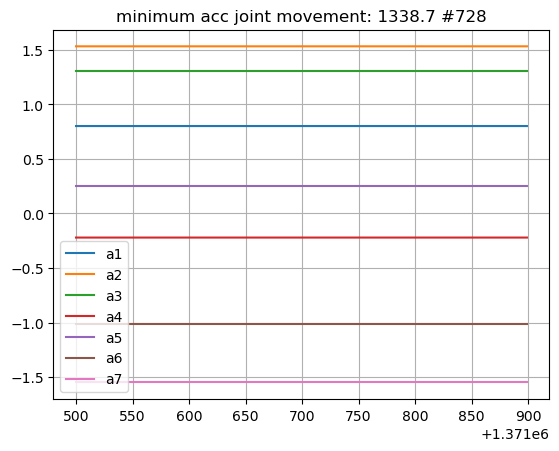

In [ ]:
print(min(mjm, key=lambda t:t[0]))
print(get_cycle_time(df, min(mjm, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mjm, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('minimum acc joint movement: '+str(np.round(min(mjm, key=lambda t:t[0])[0],2))+' #'+str(min(mjm, key=lambda t:t[0])[1]))

In [ ]:
joint_positions['mjm_init'] = get_joint_position(df, min(mjm, key=lambda t:t[0])[1], 'initial')
joint_positions['mjm_final'] = get_joint_position(df, min(mjm, key=lambda t:t[0])[1], 'final')

In [ ]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/jp_from_long_term_data_mjm_full.json', 'w') as file:
    json.dump(get_joint_position(df, min(mjm, key=lambda t:t[0])[1]), file, indent=4)
    file.close()

IndexError: single positional indexer is out-of-bounds

# ToDo

statistics:
* best cycle
* worst cycle